In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [3]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = 'Diabetic'
X,y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

# Data scaling and PCA

In [4]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(data=scaled_X)

pca = PCA(n_components=6, random_state=42)
diabetes_pca = pca.fit_transform(scaled_X)
diabetes_pca_df = pd.DataFrame(diabetes_pca)


diabetes_pca_df

,0,1,2,3,4,5
0,0.341616,0.320723,0.613101,-1.552346,-0.103262,-2.754819
1,0.084180,-0.905945,-1.869215,0.328647,0.789856,-0.152604
2,0.303530,-1.893880,0.989208,1.328431,-0.487424,-0.831087
3,2.412454,1.832804,0.336306,-0.376803,1.218578,0.146688
4,-0.837609,0.516794,0.707114,0.965449,-0.633074,-1.038153
...,...,...,...,...,...,...
14995,1.397830,-0.631129,-0.027983,2.028718,0.328260,0.677761
14996,0.147941,1.288087,0.329843,0.707594,0.898612,-0.064465
14997,-1.069615,-0.301784,-1.450437,-0.024339,1.333369,-0.363985
14998,-0.908930,0.192171,-1.348986,-1.774189,0.151337,0.474929


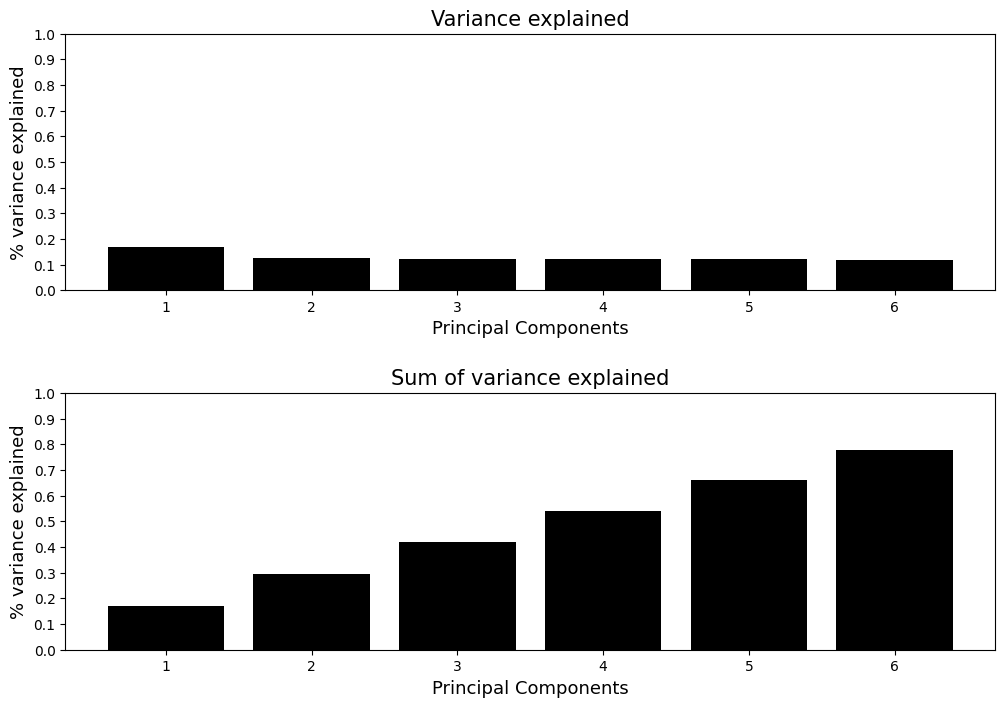

Principal component: 1, Variance explained: 0.16963, Sum of explained variance: 0.16963
Principal component: 2, Variance explained: 0.1263, Sum of explained variance: 0.29592
Principal component: 3, Variance explained: 0.12398, Sum of explained variance: 0.4199
Principal component: 4, Variance explained: 0.12204, Sum of explained variance: 0.54194
Principal component: 5, Variance explained: 0.1204, Sum of explained variance: 0.66234
Principal component: 6, Variance explained: 0.11756, Sum of explained variance: 0.7799


In [5]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Variance explained', fontsize=15)
plt.xlabel('Principal Components', fontsize=13)
plt.ylabel('% variance explained', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4, 5, 6])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Sum of variance explained', fontsize=15)
plt.xlabel('Principal Components', fontsize=13)
plt.ylabel('% variance explained', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Principal component: {principal_component}, Variance explained: {np.round(explained_var, 5)}, Sum of explained variance: {np.round(cum_explained_var, 5)}')
    principal_component += 1

# Logistic Regression Model without PCA

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=2, stratify=y)

In [7]:
scaler = StandardScaler()
X_train_standarized = scaler.fit_transform(X_train)
X_test_standarized = scaler.transform(X_test)

model_lr = LogisticRegression()
model_lr.fit(X_train_standarized, y_train)

LogisticRegression()

In [8]:
# ocena modelu

metrics_dataframe = pd.DataFrame(columns=['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics (model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])
    
    ###### metryki dla sprawdzanego modelu ######
    # Precision, Recall, Accuracy
    print(classification_report(y_checked,predictions))
    
    # Confusion Matrix
    plt.figure()
    cm = confusion_matrix(y_checked,predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()
    
    # plot ROC curve
    fig = plt.figure(figsize=(6,6))
    plt.plot([0,1],[0,1],'k--')
    for model_selected, name_selected, pred_proba in zip(models,models_names,predictions_proba_list):
        fpr,tpr,threshold = roc_curve(y_checked,pred_proba)
        plt.plot(fpr,tpr,label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model':name,'F1_score': f1_metric, 'AUC' : auc_metric}, ignore_index=True)
    
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2500
           1       0.71      0.61      0.65      1250

    accuracy                           0.79      3750
   macro avg       0.76      0.74      0.75      3750
weighted avg       0.78      0.79      0.78      3750



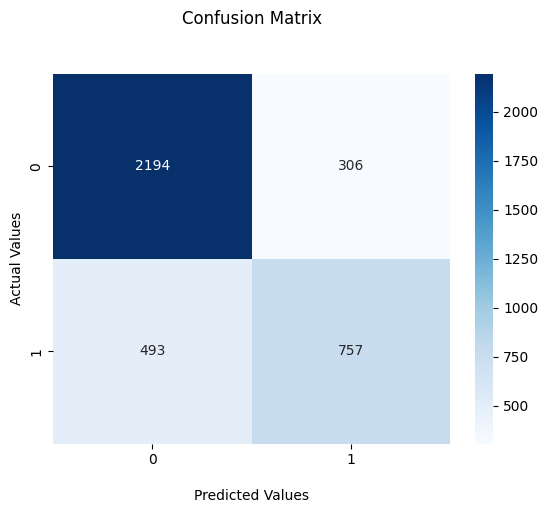

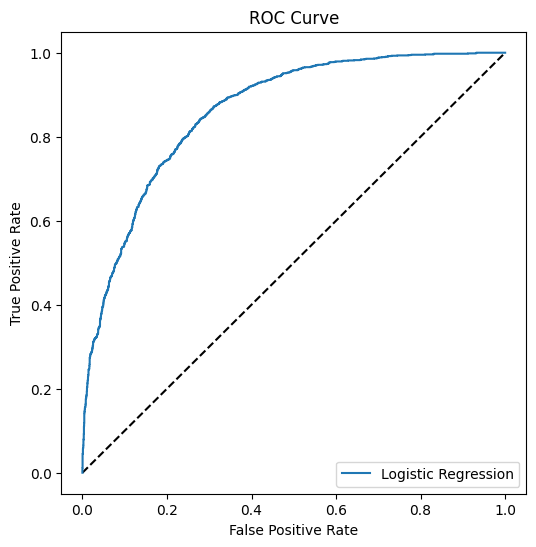

C:\Users\adacz\AppData\Local\Temp\ipykernel_15608\1995466449.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model':name,'F1_score': f1_metric, 'AUC' : auc_metric}, ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.654561,0.861788


In [9]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standarized, y_test)

# Logistic Regression Model with PCA

In [10]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = \
    train_test_split(diabetes_pca_df, y, random_state=2, stratify=y)

In [11]:
scaler = StandardScaler()
X_train_pca_stand = scaler.fit_transform(X_train_pca)
X_test_pca_stand = scaler.transform(X_test_pca)

model_lr_pca = LogisticRegression()
model_lr_pca.fit(X_train_pca_stand, y_train_pca)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2500
           1       0.72      0.60      0.65      1250

    accuracy                           0.79      3750
   macro avg       0.77      0.74      0.75      3750
weighted avg       0.78      0.79      0.78      3750



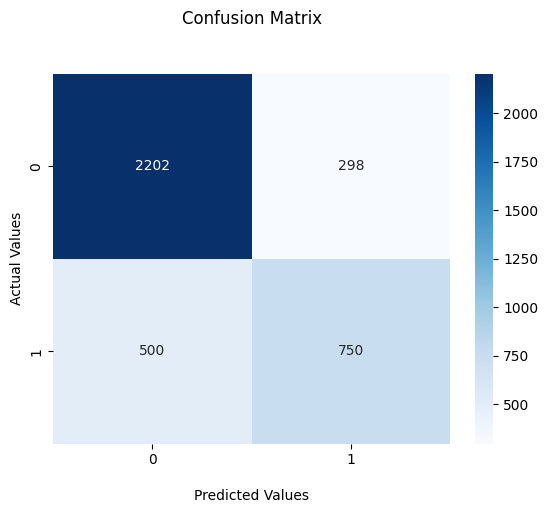

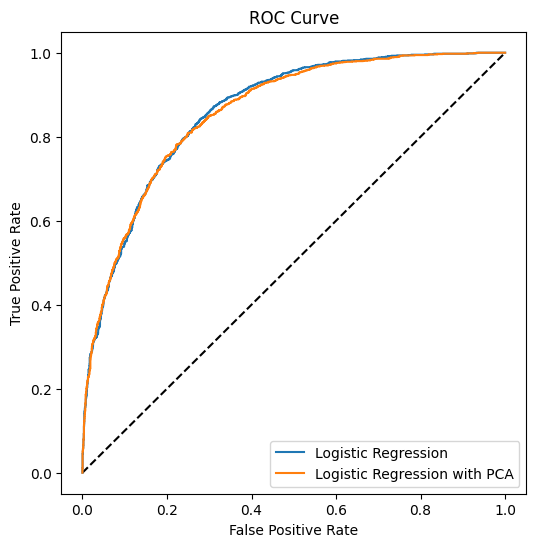

C:\Users\adacz\AppData\Local\Temp\ipykernel_15608\1995466449.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model':name,'F1_score': f1_metric, 'AUC' : auc_metric}, ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,0.654561,0.861788
1,Logistic Regression with PCA,0.652742,0.859028


In [12]:
calculate_metrics(model_lr_pca, 'Logistic Regression with PCA', X_test_pca_stand, y_test_pca)